# **Predictive Analytics - Prediksi Obesitas**

## Deskripsi Proyek

Proyek ini bertujuan untuk memprediksi tingkat obesitas berdasarkan berbagai fitur. Dataset akan digunakan untuk melatih beberapa model machine learning, termasuk Decision Tree, XGBoost, Random Forest, SVM, Logistic Regression, LightGBM. Hasil dari model-model tersebut akan dibandingkan dan dievaluasi untuk memilih model yang paling tepat dalam memprediksi tingkat obesitas dengan metrik-metriknya.


*Dataset yang digunakan pada proyek ini:*  
https://www.kaggle.com/competitions/playground-series-s4e2/data


| **Variable**                  | **Description**                                 | **Variable**        | **Description**                          |
|:------------------------------|:------------------------------------------------|:--------------------|:-----------------------------------------|
| **ID**                        | Unique identifier                               | **NCP**             | Number of main meals                     |
| **Gender**                    | Gender                                          | **CAEC**            | Consumption of food between meals        |
| **Age**                       | Age (years)                                     | **SMOKE**           | Smoker or not                            |
| **Height**                    | Height (meters)                                 | **CH2O**            | Consumption of water daily               |
| **Weight**                    | Weight (kilograms)                              | **SCC**             | Calories consumption monitoring          |
| **family_history_with_overweight** | Family history of overweight            | **FAF**             | Physical activity frequency              |
| **FAVC**                      | Frequent consumption of high caloric food       | **TUE**             | Time using technology devices            |
| **FCVC**                      | Frequency of consumption of vegetables          | **CALC**            | Consumption of alcohol                   |
| **MTRANS**                    | Transportation used                             | **NObeyesdad**     | Obesity level deducted                   |


## Import Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

### Gathering Data


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [4]:
test.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.0,Sometimes,no,3.000000,no,1.0000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.0,Sometimes,no,2.621877,no,0.0000,0.250502,Sometimes,Public_Transportation


menampilkan 3 data pada train.csv dan test.csv” memang akurat karena sesuai dengan hasil dan fungsi dari .head(3) pada masing-masing dataframe

### Assessing Data

#### Dataset Information

In [5]:
train.shape

(20758, 18)

Dataset train memiliki 20758 baris (data) dan 18 kolom (fitur/variabel).



In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Semua kolom memiliki 20758 non-null, artinya tidak ada nilai yang hilang di seluruh kolom.

#### Checking Missing Value


In [7]:
print("Is there any missing values?")
train.isna().any()

Is there any missing values?


,0
id,False
Gender,False
Age,False
Height,False
Weight,False
family_history_with_overweight,False
FAVC,False
FCVC,False
NCP,False
CAEC,False


Dataset train berisi 20758 data dan 18 kolom.

Semua data lengkap, tidak ada nilai yang kosong/missing.

Data terdiri dari tipe numerik dan kategorikal.

#### Checking Duplicate Data


In [8]:
print("The number of duplicated data:", train.duplicated().sum())

The number of duplicated data: 0


Tidak terdapat data duplikat

#### Checking Outlier Data


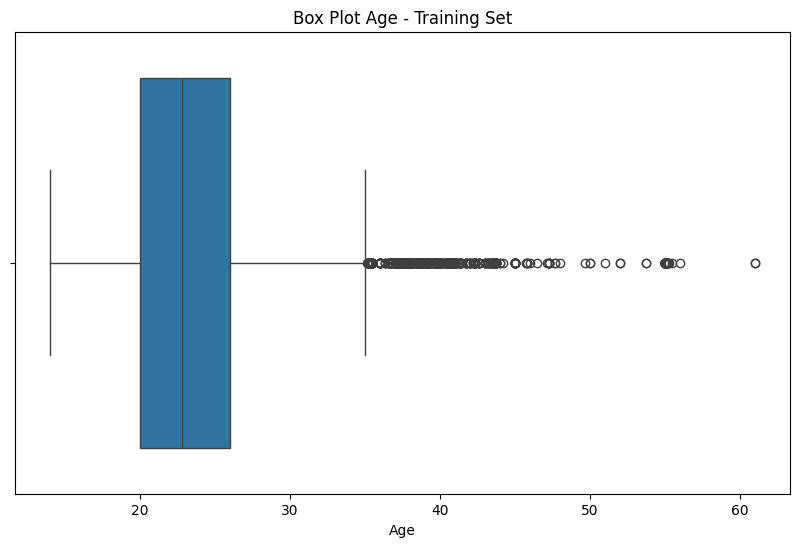

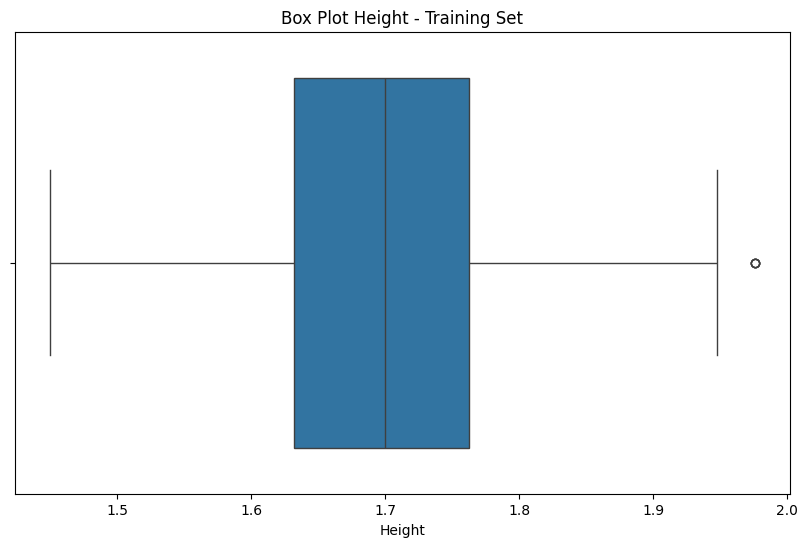

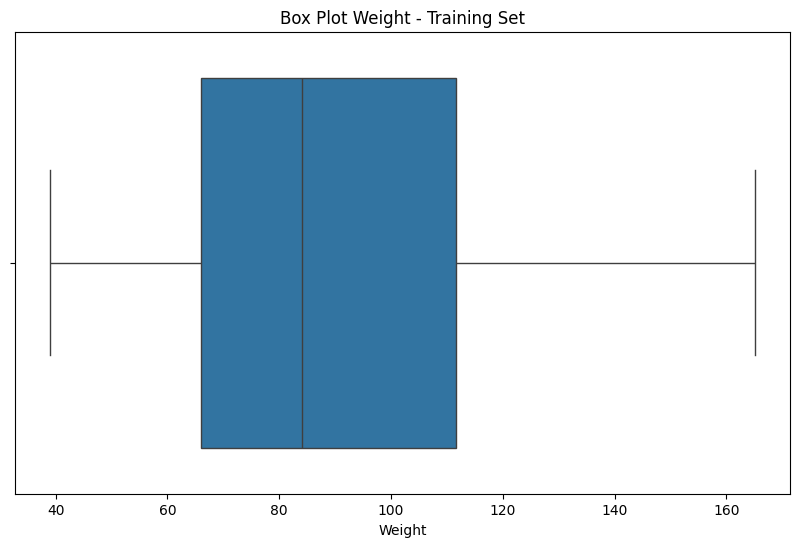

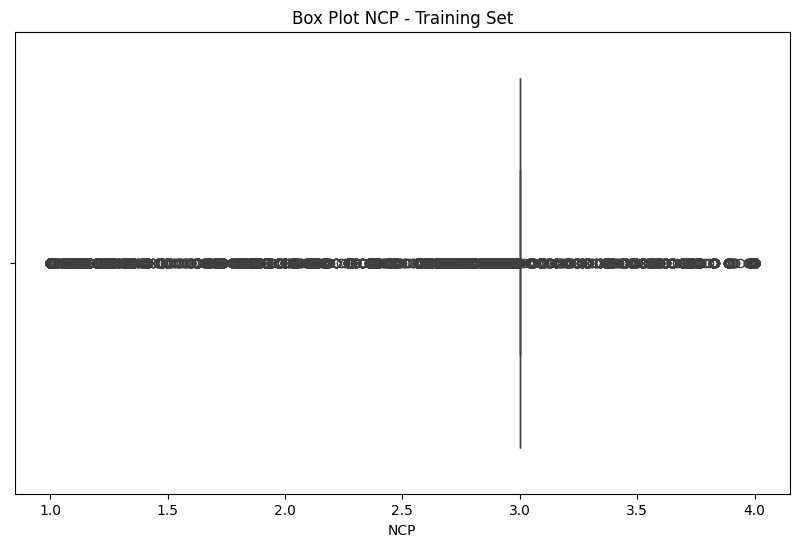

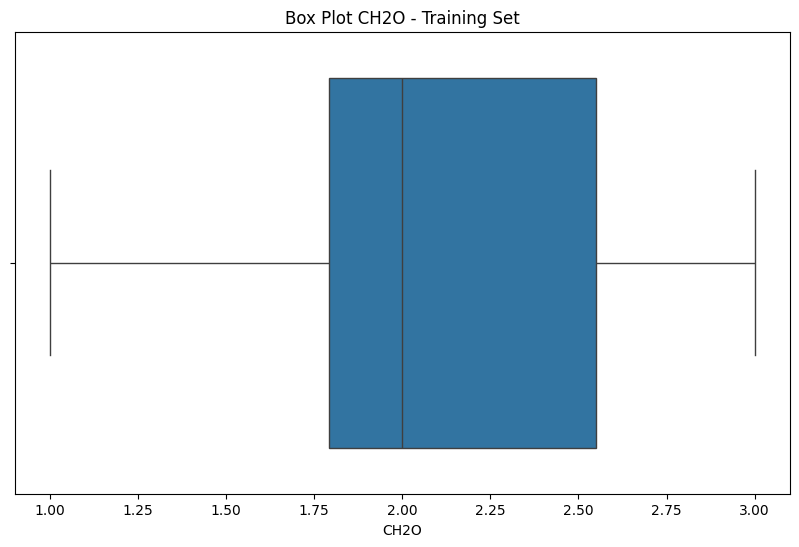

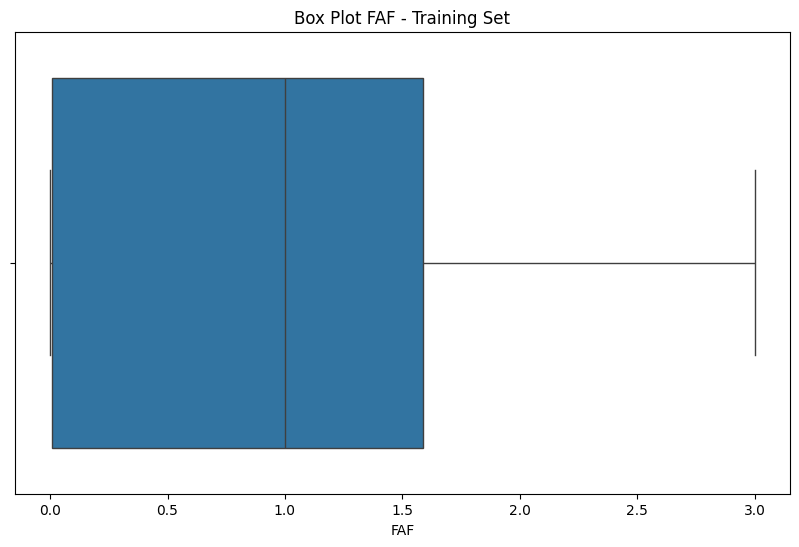

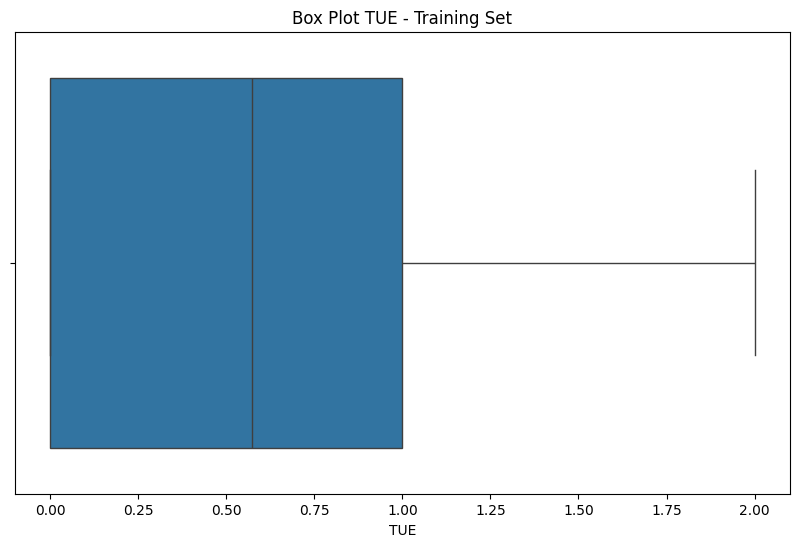

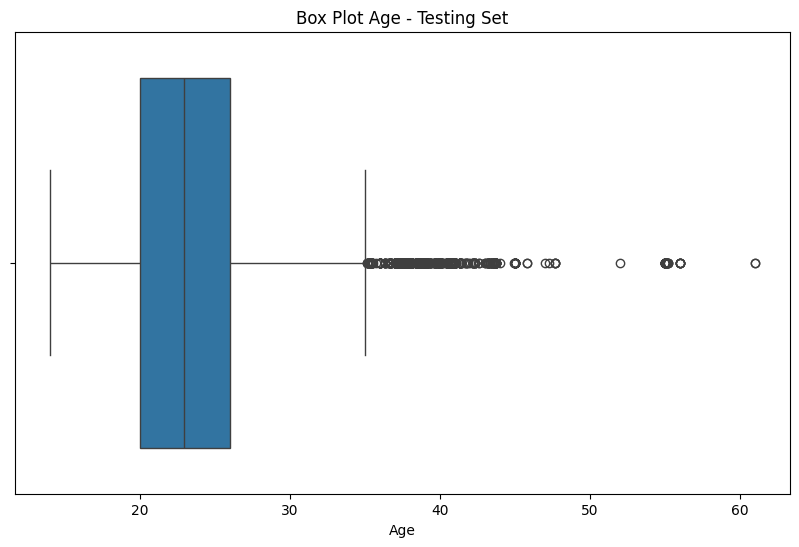

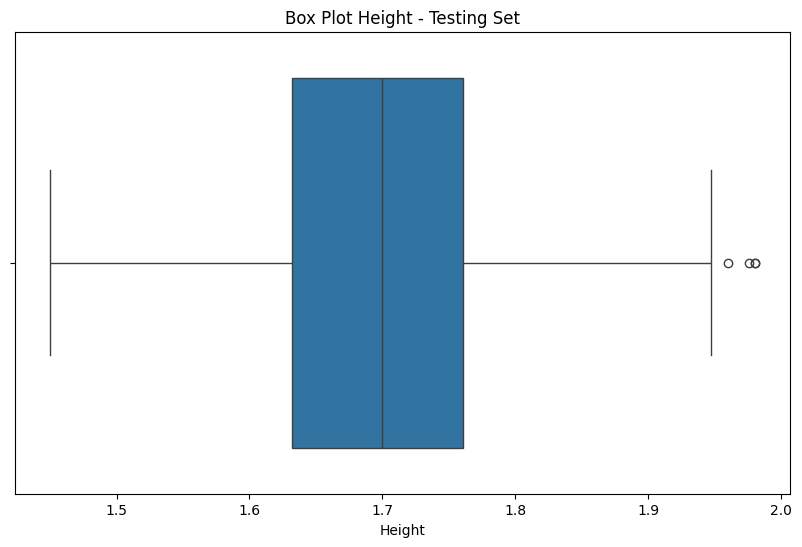

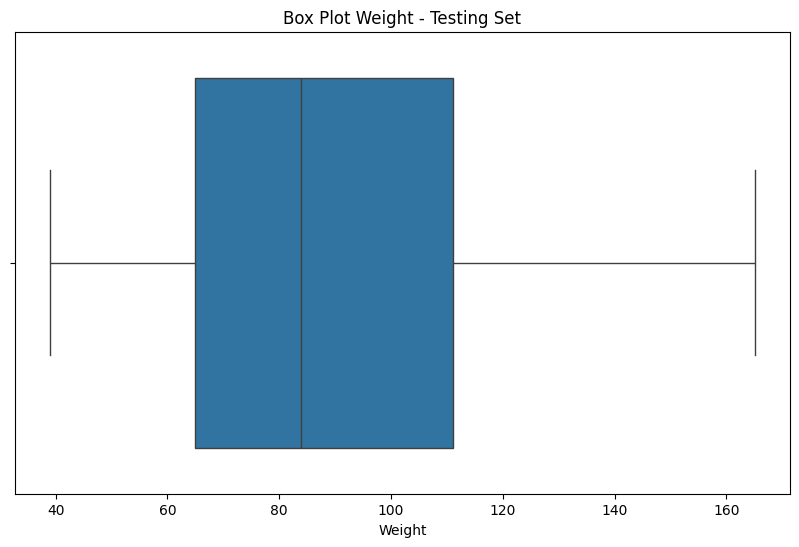

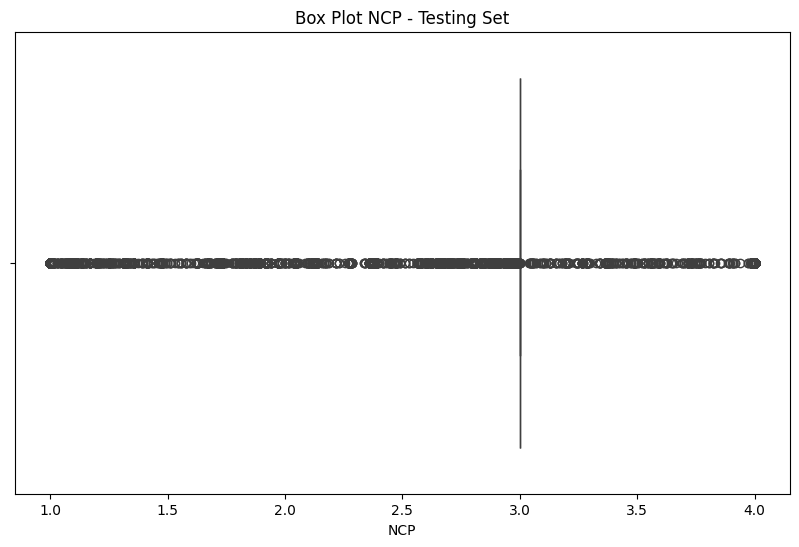

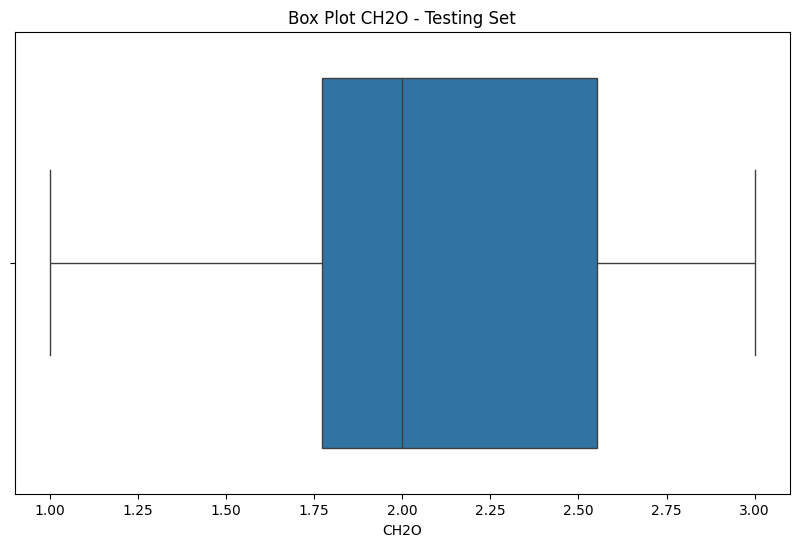

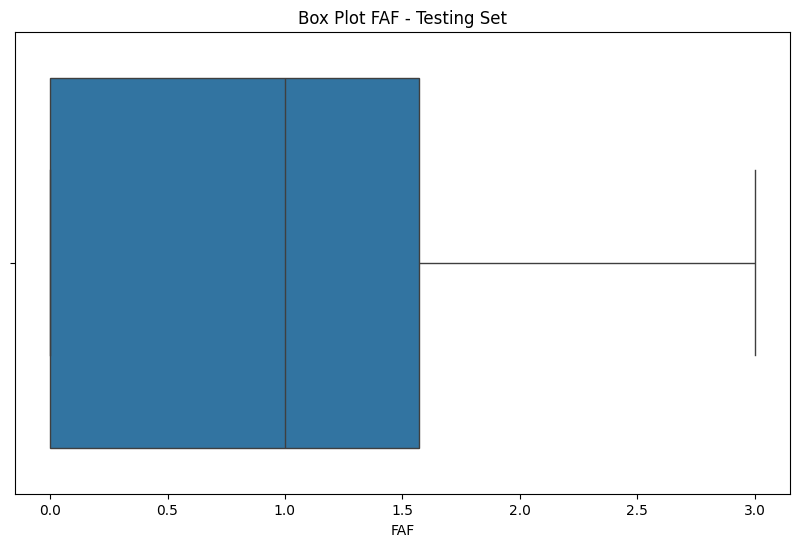

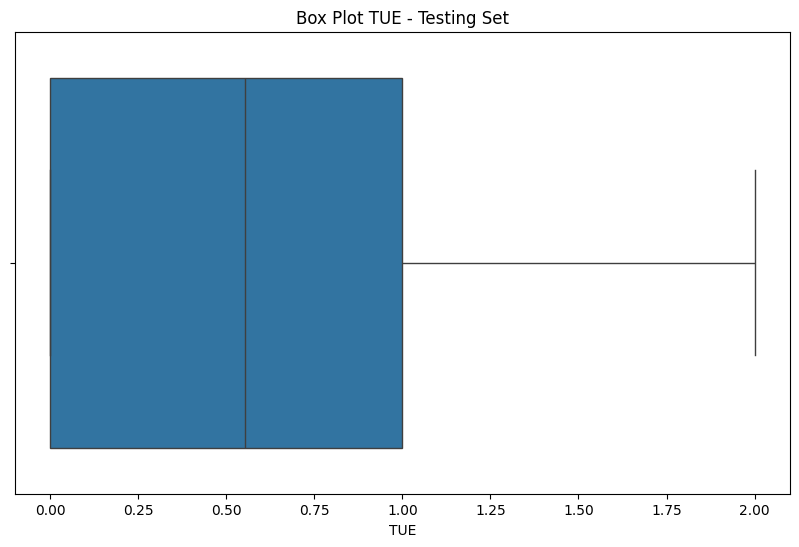


Informasi Outlier Training Set:
        jumlah_outlier  persentase_outlier  batas_bawah  batas_atas  \
Age             1074.0            5.173909    11.000000   35.000000   
Height             4.0            0.019270     1.435309    1.959434   
Weight             0.0            0.000000    -2.400830  180.001383   
NCP             6052.0           29.155025     3.000000    3.000000   
CH2O               0.0            0.000000     0.655630    3.686009   
FAF                0.0            0.000000    -2.361077    3.956496   
TUE                0.0            0.000000    -1.500000    2.500000   

        nilai_minimum  nilai_maksimum  
Age             14.00       61.000000  
Height           1.45        1.975663  
Weight          39.00      165.057269  
NCP              1.00        4.000000  
CH2O             1.00        3.000000  
FAF              0.00        3.000000  
TUE              0.00        2.000000  

Informasi Outlier Testing Set:
        jumlah_outlier  persentase_outlier  ba

In [9]:
def detect_outliers(train, test, numeric_columns):
    outlier_info = {'Training Set': {}, 'Testing Set': {}}

    for dataset_name, dataset in [('Training Set', train), ('Testing Set', test)]:
        for column in numeric_columns:
            # Hitung Q1, Q3, dan IQR
            Q1 = dataset[column].quantile(0.25)
            Q3 = dataset[column].quantile(0.75)
            IQR = Q3 - Q1

            # Hitung batas atas dan bawah
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identifikasi outlier
            outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)][column]

            outlier_info[dataset_name][column] = {
                'jumlah_outlier': len(outliers),
                'persentase_outlier': (len(outliers) / len(dataset)) * 100,
                'batas_bawah': lower_bound,
                'batas_atas': upper_bound,
                'nilai_minimum': dataset[column].min(),
                'nilai_maksimum': dataset[column].max()
            }

            # Box plot
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=dataset[column])
            plt.title(f'Box Plot {column} - {dataset_name}')
            plt.show()

    return outlier_info

numeric_columns = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']

outlier_results = detect_outliers(train, test, numeric_columns)

print("\nInformasi Outlier Training Set:")
print(pd.DataFrame(outlier_results['Training Set']).T)

print("\nInformasi Outlier Testing Set:")
print(pd.DataFrame(outlier_results['Testing Set']).T)



> Mendefinisikan fungsi detect_outliers yang menerima tiga argumen:

*   train: dataset pelatihan.
*   test: dataset pengujian
*   numeric_columns: daftar kolom numerik yang ingin dianalisis outlier-nya.

> outlier_info

dictionary untuk menyimpan informasi outlier dari masing-masing dataset.


> Insight:

Menyediakan struktur awal untuk menyimpan statistik outlier secara terpisah antara training dan testing.

> Iterasi Dataset dan Kolom

*   Melakukan iterasi terhadap kedua dataset (train dan test) serta setiap kolom numerik di dalamnya.
* Memastikan proses pengecekan outlier dilakukan untuk semua kolom numerik di kedua dataset secara sistematis.


> Hitung Statistik IQR dan Batas Outlier


* Menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan Interquartile Range (IQR).
* Menentukan batas bawah dan atas untuk mendeteksi outlier berdasarkan metode IQR.
* Nilai-nilai di bawah lower_bound atau di atas upper_bound dianggap sebagai outlier secara statistik
*   List item

> Identifikasi dan Simpan Informasi Outlier

*   Menentukan baris-baris yang mengandung outlier.
*   Menyimpan informasi lengkap:
    *   Jumlah dan persentase outlier.
    *   Batas bawah dan atas.
    *   Nilai minimum dan maksimum aktual dari kolom tersebut.
*   Dapat mengetahui kolom mana yang memiliki penyimpangan signifikan dan seberapa besar proporsinya.



> Visualisasi Outlier dengan Boxplot


*   Membuat visualisasi box plot untuk setiap kolom numerik.
*   Visual membantu mengenali outlier secara cepat melalui titik-titik yang menyimpang dari kotak plot.
*   Bisa langsung melihat distribusi data dan sebaran outlier secara visual — penting untuk pengambilan keputusan pembersihan data.



> Pemanggilan Fungsi dan Cetak Hasil


*   Menentukan kolom numerik yang akan dianalisis.
*   Memanggil fungsi detect_outliers.
*   Mencetak hasil analisis dalam bentuk dataframe agar rapi dan mudah dibaca.
*   Menyajikan ringkasan statistik outlier untuk masing-masing kolom dan dataset.
*   Memberikan dasar untuk melakukan pembersihan data (misalnya, menghapus atau menangani outlier secara khusus).






























#### Statistic Description

In [10]:
# summary statistics
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


> Menampilkan ringkasan statistik untuk kolom numerik dalam bentuk transpose, agar lebih mudah dibaca per fitur (baris = fitur, kolom = statistik).

*   mean: Rata-rata nilai
*   count: Jumlah data non-null per kolom
*   std: Standar deviasi (penyebaran data)
*   min / max: Nilai minimum dan maksimum
*   25% / 50% / 75%: Kuartil pertama (Q1), median (Q2), dan kuartil ketiga (Q3)
*   Kolom Weight memiliki rentang yang sangat lebar dari 0.0 hingga 173.0, ini  
    bisa mengindikasikan adanya outlier
*   Kolom TUE rata-ratanya sangat kecil (~0.0167) dan memiliki rentang sempit
    (0 hingga 2), bisa jadi kategori.











### Exploratory Data Analysis (EDA)

#### 1. Correlation Matrix

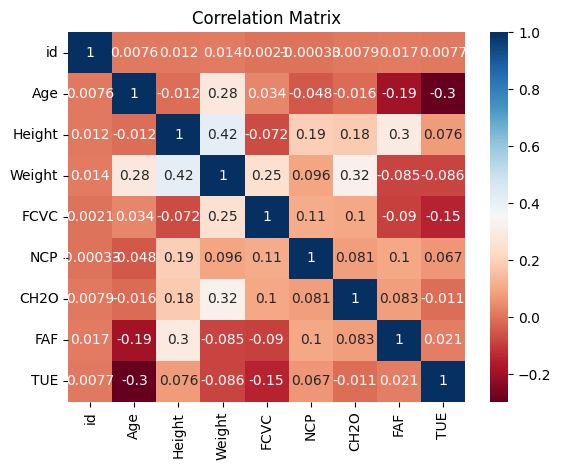

In [11]:
corr = train.select_dtypes("number").corr()

sns.heatmap(corr, annot=True, cmap="RdBu")
plt.title("Correlation Matrix")
plt.show()



> Penjelasan Kode:

1.   sns.heatmap(corr, annot=True, cmap="RdBu"):
     *   LMenampilkan heatmap (peta panas) dari matriks korelasi corr.
     *   annot=True: Menampilkan angka korelasi di dalam kotak.
    *   cmap="RdBu": Menggunakan skema warna dari merah ke biru (baik untuk membedakan korelasi negatif vs positif).

2.   plt.title("Correlation Matrix"):
    *   Memberi judul pada plot agar lebih informatif.
3.  plt.show():



> Hasil Heatmap Korelasi

menampilkan matriks korelasi antar fitur numerik dalam dataset, termasuk:


*   Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE.

Matriks korelasi ini memperlihatkan sejauh mana hubungan linier antara dua variabel. Nilainya berkisar dari:
*   +1: korelasi sempurna positif.
*   -1: korelasi sempurna negatif.
*   0: tidak ada korelasi linier.


> Insight:


1. Height dan Weight → korelasi 0.42
   *   Korelasi positif moderat.
   *   Masuk akal: orang tinggi cenderung berat badannya lebih besar.
   *   Tapi nilai 0.42 menunjukkan tidak terlalu tinggi, jadi tidak berlebihan berkaitan.


2. Weight dan FAF (frekuensi aktivitas fisik) → korelasi -0.085
   *   Korelasi negatif sangat lemah.
   *   Artinya semakin sering olahraga (FAF naik), berat badan cenderung turun, meskipun pengaruhnya kecil.

3. CH2O (konsumsi air) dan FAF → korelasi 0.083
   *   Korelasi kecil positif.
   *   Bisa mencerminkan gaya hidup sehat: orang yang sering olahraga juga lebih banyak minum air.


4. Mayoritas nilai korelasi rendah (< 0.3)
   *   Ini baik karena menunjukkan bahwa sebagian besar fitur relatif independen.
   *  Ini bagus untuk model seperti decision tree, random forest, atau XGBoost yang tidak sensitif terhadap korelasi tinggi.













#### 2. Data Distibution

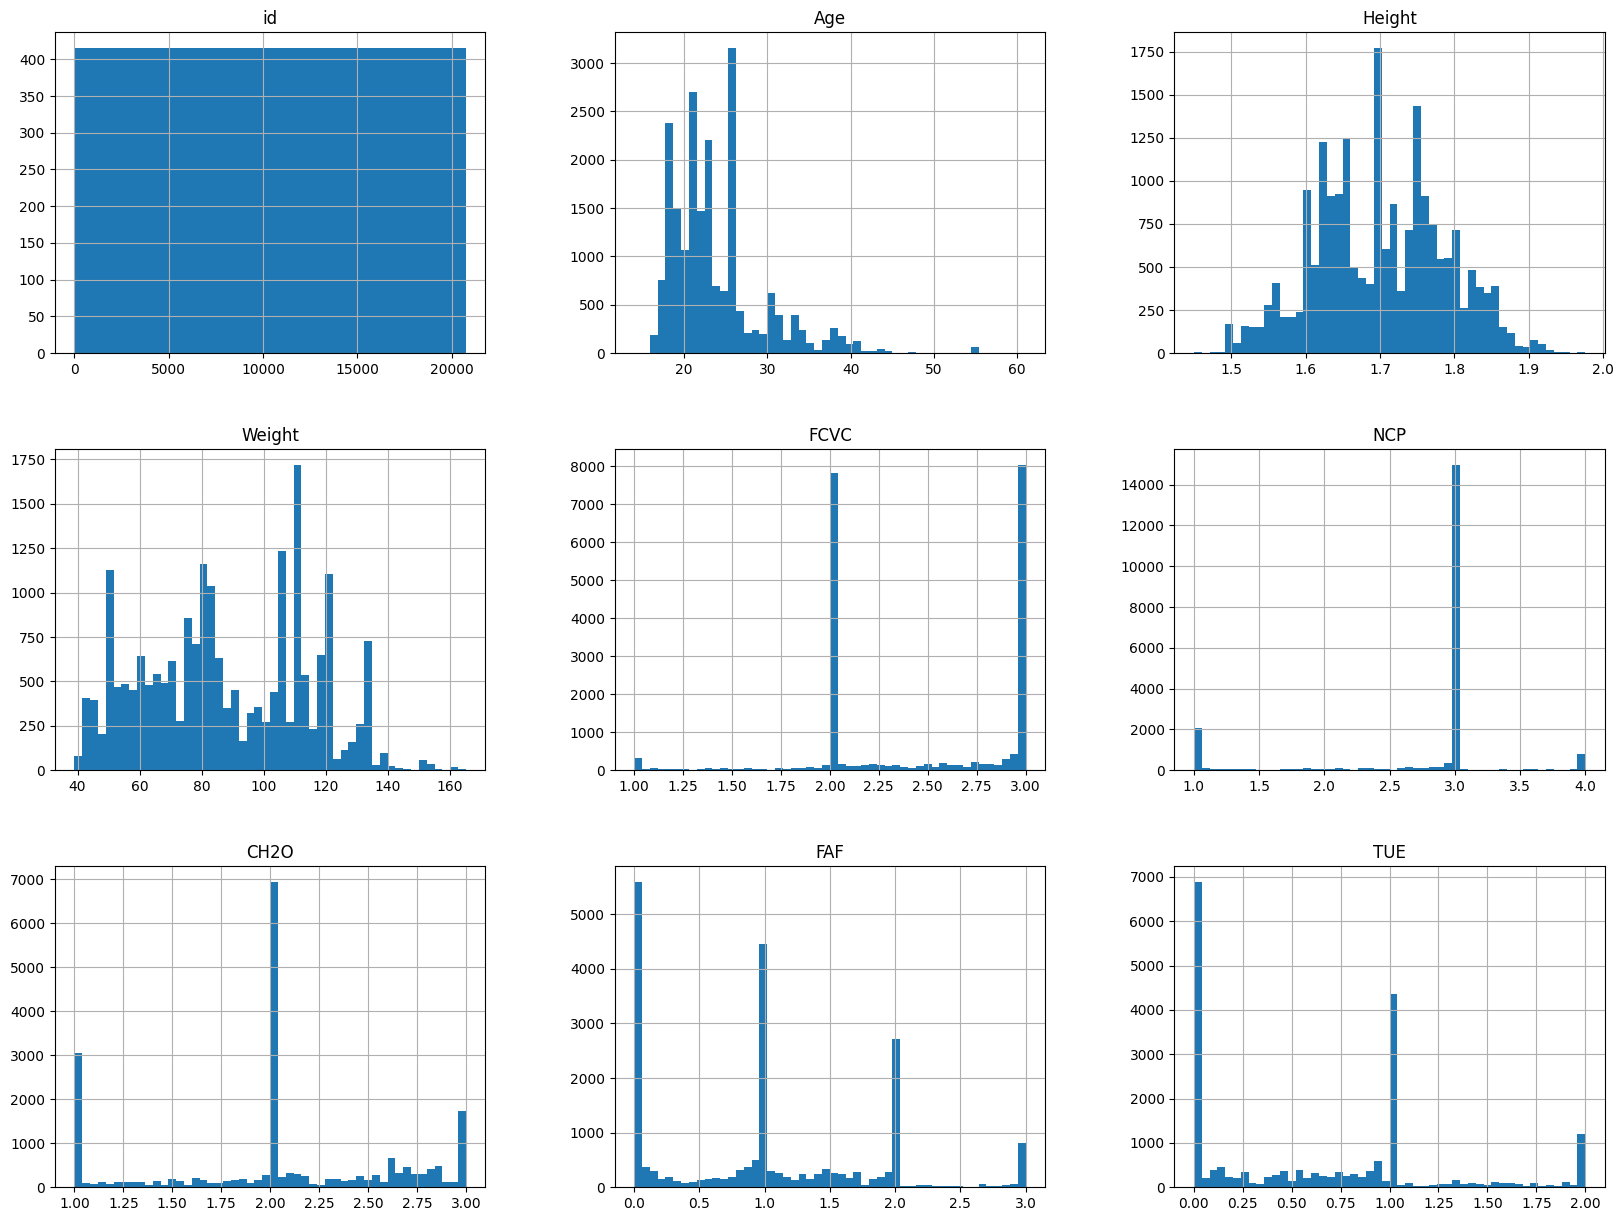

In [12]:
train.hist(bins=50, figsize=(20,15))
plt.show()



> Penjelasan Kode:

1.   train.hist(bins=50, figsize=(20,15)):
     *   Membuat histogram untuk setiap kolom numerik dalam DataFrame train.
     *   bins=50: Memecah rentang data menjadi 50 interval (semakin banyak bin, semakin detail bentuk distribusinya).
     * figsize=(20,15): Ukuran keseluruhan grid plot agar terlihat jelas.
2.   plt.show():
     *   Menampilkan semua plot secara bersamaan.


1.    id
    *   Distribusi seragam (flat).
    *   Tidak informatif karena hanya ID unik → tidak berguna untuk prediksi, bisa di-drop.
2.   Age
    *   Distribusi positif skew (condong ke kiri).
    *   Banyak individu berusia 15–30 tahun, sangat sedikit yang >40.
    * Bisa jadi indikator penting, tapi mungkin perlu transformasi log jika digunakan dalam model sensitif distribusi.
3. Height
   *   Terdistribusi cukup normal (simetris).
   *   Puncaknya di sekitar 1.65–1.75 meter.
   *   Tidak ada nilai ekstrem mencolok.
4. Weight
  *   Terlihat multi-modal (banyak puncak) → bisa menunjukkan adanya sub-kelompok dalam data (misal kategori gender, atau berat badan ideal/obesitas).
  *   Ada nilai >140 yang bisa jadi outlier.
5. FCVC (Frekuensi Konsumsi Sayur)
  *   Banyak data di nilai maksimum (3.0).
  *   Mungkin karena banyak responden memberi jawaban ekstrem (makan sayur sangat sering).
  * Bisa jadi fitur penting, tapi distribusinya sangat tidak merata.
6. NCP (Jumlah Makan per Hari)
  *   Mayoritas memilih nilai 3.0.
  *   Data sangat tidak seimbang.
  * Ini menunjukkan perilaku makan masyarakat, tapi mungkin perlu diubah jadi kategori.
7. CH2O (Konsumsi Air per Hari)

  * Ada puncak kuat di nilai 2.0 dan 3.0.
  * Artinya mayoritas minum 2-3 liter per hari.
  * Data tidak seimbang tapi masih bisa dimodelkan.
8. FAF (Frekuensi Aktivitas Fisik)
  * Banyak yang tidak berolahraga (FAF = 0).
  * Puncak berikutnya di sekitar 1.0.
  * Menunjukkan sebagian besar populasi kurang aktif.
9. TUE (Waktu Menggunakan Teknologi untuk Hiburan)
  *   Puncak di sekitar 1.0, lalu banyak yang 0.
  *   Artinya sebagian besar orang menggunakan teknologi 1 jam per hari untuk hiburan.
  * Distribusi mencolok, bisa jadi fitur signifikan.
















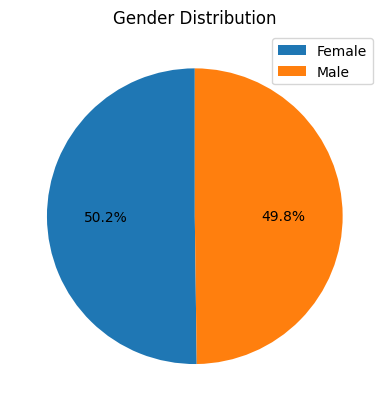

In [13]:
train["Gender"].value_counts().plot(kind="pie", startangle=90, autopct='%1.1f%%', labels=None)

plt.ylabel("")
plt.legend(train["Gender"].value_counts().index, loc="best")
plt.title("Gender Distribution")

plt.show()

Dataset seimbang secara gender:

Female: 50.2%

Male: 49.8%

Distribusi yang seimbang ini baik untuk menghindari bias gender pada model prediktif.

Text(0, 0.5, 'Kelas Obesity')

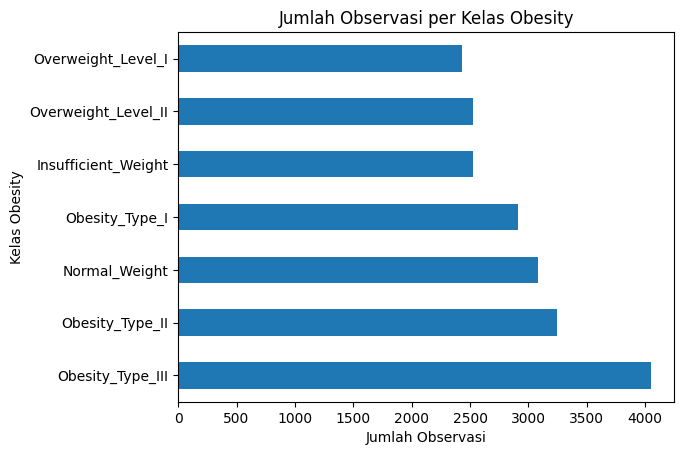

In [14]:
# Menghitung jumlah observasi pada setiap kelas
class_counts = train['NObeyesdad'].value_counts()

# Membuat bar plot horizontal
class_counts.plot(kind='barh')

# Memberikan judul dan label sumbu yang sesuai
plt.title('Jumlah Observasi per Kelas Obesity')
plt.xlabel('Jumlah Observasi')
plt.ylabel('Kelas Obesity')



> Insight yang Didapatkan
1.   Distribusi Kelas Tidak Seimbang
Terlihat bahwa beberapa kelas seperti Obesity_Type_III memiliki jumlah observasi yang jauh lebih tinggi dibanding kelas lain seperti Insufficient_Weight atau Overweight_Level_I. Artinya, dataset ini memiliki ketidakseimbangan kelas (class imbalance).
2.   Obesity_Type_III Paling Dominan
Kelas Obesity_Type_III merupakan kelas terbanyak dalam dataset. Hal ini perlu diperhatikan karena model bisa menjadi bias terhadap kelas mayoritas jika ketidakseimbangan ini tidak ditangani.

3. Normal_Weight dan Obesity_Type_II Juga Banyak
Dua kelas besar lainnya adalah Normal_Weight dan Obesity_Type_II, menunjukkan bahwa distribusi berat badan sebagian besar berpusat pada kondisi normal dan obesitas berat.






## Data Preparation

### Feature Engineering

Terdapat fitur yang dapat kita buat dari fitur yang ada yaitu BMI (Body Mass Index). BMI merupakan indikator yang akurat untuk mengukur proporsi tubuh dan menilai risiko penyakit terkait obesitas, seperti diabetes, hipertensi dan penyakit jantung. Dengan mengkalkulasi BMI, dapat ditentukan tingkat keparahan obesitas dan strategi pencegahan serta pengobatan yang tepat. Selain itu, BMI juga membantu mengidentifikasi individu berisiko tinggi, memantau perubahan berat badan dan menentukan kebutuhan nutrisi. Oleh karena itu, pengkalkulasian BMI menjadi salah satu faktor penting dalam prediksi obesitas.

In [15]:
train["BMI"] = train["Weight"] / train["Height"]**2



> Menambahkan Fitur BMI
BMI (Body Mass Index) ditambahkan sebagai fitur baru.

Rumus yang digunakan sesuai standar BMI = berat (kg) ÷ tinggi² (m²).

Fitur ini penting karena BMI berhubungan langsung dengan klasifikasi obesitas.



### Splitting Data

In [16]:
X = train.drop("NObeyesdad", axis=1).copy()
y = train["NObeyesdad"].copy()

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)



> Split Dataset

Memisahkan fitur (X) dan label (y) dari dataset.

Dataset dibagi menjadi data latih dan data uji dengan rasio 80:20.

random_state=2024 digunakan agar pembagian konsisten (reproducible).



### Standarisasi dan Encoding Data

#### Pemilihan Kolom
Memilih kolom numerik dan kategorikal dari data latih.



In [17]:
numerical_columns = X_train.select_dtypes("number").columns

categorical_columns = X_train.select_dtypes(exclude=["number"]).columns

Numerik: Semua kolom bertipe angka.

Kategorikal: Semua kolom non-numerik.

Langkah ini penting untuk:

Menerapkan standarisasi hanya pada data numerik (misal: StandardScaler)

Menerapkan encoding (misal: OneHotEncoder) hanya pada data kategorikal.

#### Pembuatan Preprocessor
Mengubah variabel kategorikal menjadi representasi numerik menggunakan One-Hot Encoding dan mengubah skala fitur numerik menjadi skala seragam menggunakan StandardScaler.

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

> Menggabungkan preprocessing untuk fitur numerik dan kategorikal.



StandardScaler() digunakan untuk fitur numerik → menghasilkan nilai berdistribusi normal (mean=0, std=1).

OneHotEncoder() untuk fitur kategorikal → mengubah kategori menjadi vektor biner.

handle_unknown="ignore" → menghindari error jika ada kategori baru saat data uji.

#### Pembuatan Pipeline

Preprocessor sebagai fungsi melakukan proses standarisasi dan encoding digabungkan sebagai Pipeline dari library scikit-learn.

In [19]:
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

Membuat alur preprocessing secara terstruktur.

Pipeline membuat proses lebih ringkas dan reproducible.

#### Transformasi Data

Menerapkan preprocessing pada data latih dan data uji.

In [20]:
X_train_cleaned = pipeline.fit_transform(X_train)
X_test_cleaned = pipeline.transform(X_test)

fit_transform pada data latih → belajar parameter dan transformasi.

transform pada data uji → hanya transformasi dengan parameter dari data latih.

Hasilnya adalah data siap masuk ke model machine learning.

## Model Development



### Algoritma Decision Tree

In [21]:
# Membuat dan Melatih Model Decision Tree
# Melatih model Decision Tree
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state=2024)
dec_tree.fit(X_train_cleaned, y_train)

DecisionTreeClassifier(random_state=2024)



> Pada tahap ini, membuat objek DecisionTreeClassifier dengan parameter random_state=2024 untuk memastikan hasil yang konsisten. Kemudian model tersebut dilatih menggunakan data pelatihan (X_train_cleaned dan y_train).



In [22]:
# Membuat prediksi
y_pred_train = dec_tree.predict(X_train_cleaned)
y_pred_test = dec_tree.predict(X_test_cleaned)



> Setelah model selesai dilatih, kita menggunakan model tersebut untuk memprediksi label kelas pada data pelatihan dan pengujian. Ini akan digunakan untuk mengevaluasi performa model terhadap data yang dikenal (train) dan tidak dikenal (test).



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Training Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train, average='weighted'))


Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0




> Evaluasi dilakukan terhadap prediksi pada data pelatihan untuk mengetahui apakah model mengalami overfitting (terlalu cocok dengan data training). Metrik yang digunakan adalah:

    *   Accuracy: proporsi prediksi yang benar.
    *   Precision: ketepatan prediksi tiap kelas.
    *   Recall: seberapa banyak kasus positif yang berhasil terdeteksi.
    *   F1-score: harmonisasi antara precision dan recall.


> Overfitting Terdeteksi

    *   Training Accuracy, Precision, Recall, F1-score = 1.0
        * Artinya model sempurna dalam mengenali data latih.
    *   Penurunan cukup signifikan dibanding training (100% vs 83.7%).



> Insight


Model terlalu cocok terhadap data latih dan kurang mampu menggeneralisasi ke data baru. Ini indikasi overfitting — Decision Tree memang rawan mengalami ini jika tidak dilakukan pruning atau pengaturan parameter maksimal.










In [24]:
print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test, average='weighted'))


Testing Metrics:
Accuracy: 0.8367052023121387
Precision: 0.8372832191136368
Recall: 0.8367052023121387
F1-score: 0.836770714622821




> Evaluasi Performa Umum (Testing Set)


    *   Accuracy: 83.67%  
    *   Precision (weighted): 83.73%
    *   Recall (weighted): 83.67%
    *   F1-score (weighted): 83.71%


>  Insight
Secara keseluruhan, model memiliki kinerja yang cukup baik, tapi masih ada ruang untuk perbaikan terutama untuk kelas-kelas tertentu.







In [25]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.88      0.89       500
      Normal_Weight       0.77      0.80      0.79       597
     Obesity_Type_I       0.79      0.79      0.79       599
    Obesity_Type_II       0.93      0.93      0.93       668
   Obesity_Type_III       0.99      0.99      0.99       789
 Overweight_Level_I       0.70      0.65      0.68       504
Overweight_Level_II       0.67      0.71      0.69       495

           accuracy                           0.84      4152
          macro avg       0.82      0.82      0.82      4152
       weighted avg       0.84      0.84      0.84      4152





>  Insight


      *   Model sangat baik dalam mengklasifikasikan Obesity_Type_III, Obesity_Type_II, dan Insufficient_Weight (F1-score ≥ 0.89).
      *   Overweight_Level_I dan II menjadi kelas yang paling sulit diprediksi (F1-score rendah: 0.68 dan 0.77). Ini bisa disebabkan oleh:
          * Data dari kelas ini saling tumpang tindih (ambiguous).
          * Fitur yang digunakan belum cukup diskriminatif untuk membedakan level overweight.





### Algorima XGBoost

In [26]:
# Melatih model XGBoost
xgb = GradientBoostingClassifier()
xgb.fit(X_train_cleaned, y_train)

GradientBoostingClassifier()



> Penjelasan:

      *   Membuat objek model xgb menggunakan algoritma Gradient Boosting dari sklearn.
      *   Melatih model dengan data training (X_train_cleaned, y_train).
      *   Gradient Boosting merupakan teknik ensemble learning yang menggabungkan banyak pohon keputusan secara bertahap (boosting).



In [27]:
# Membuat prediksi
y_pred_train = xgb.predict(X_train_cleaned)
y_pred_test = xgb.predict(X_test_cleaned)



> Penjelasan:


      *   Melakukan prediksi label untuk data training dan data testing menggunakan model XGBoost yang telah dilatih.
      *   y_pred_train: hasil prediksi untuk data training.
      *   y_pred_test: hasil prediksi untuk data testing.



In [28]:
# Menghitung metrik untuk data training
print("Training Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train, average='weighted'))

Training Metrics:
Accuracy: 0.9238829338793207
Precision: 0.9236832773133827
Recall: 0.9238829338793207
F1-score: 0.9236847969464334




> Training Metrics:


    *   Accuracy: 92.88%
    *   Precision/Recall/F1-score: ±92.88%





In [29]:
print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test, average='weighted'))


Testing Metrics:
Accuracy: 0.8986030828516378
Precision: 0.898116729562829
Recall: 0.8986030828516378
F1-score: 0.8982363762084005




> Testing Metrics:


      *  Accuracy: 89.86%
      *  Precision (weighted): 89.00%
      *  Recall (weighted): 89.86%
      *  F1-score (weighted): 89.82%


> Insight

  Model XGBoost menunjukkan peningkatan akurasi sekitar 5% dibanding Decision Tree pada data testing (83.67% ➝ 88.91%). Ini berarti XGBoost lebih mampu melakukan generalisasi dan tidak overfitting separah Decision Tree.





In [30]:
# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.93       500
      Normal_Weight       0.86      0.88      0.87       597
     Obesity_Type_I       0.88      0.89      0.88       599
    Obesity_Type_II       0.96      0.97      0.97       668
   Obesity_Type_III       1.00      0.99      1.00       789
 Overweight_Level_I       0.81      0.77      0.79       504
Overweight_Level_II       0.79      0.78      0.78       495

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152





>  Insight:


    *   Performa sangat baik untuk kelas Obesity_Type_III dan II (F1-score 0.94–0.97).
    *   Overweight_Level_I dan II masih menjadi tantangan, tapi sudah meningkat dibanding Decision Tree.
    *   Distribusi precision dan recall lebih seimbang antar kelas dibanding model sebelumnya.





### RandomForestClassifier

In [31]:
# Melatih model Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_cleaned, y_train)

RandomForestClassifier()



> Melatih model Random Forest


    *   Membuat model klasifikasi menggunakan algoritma Random Forest, yang merupakan ensemble dari beberapa decision tree.
    *   Model ini dilatih menggunakan data training X_train_cleaned dan target y_train.




In [32]:
# Membuat prediksi
y_pred_train = random_forest.predict(X_train_cleaned)
y_pred_test = random_forest.predict(X_test_cleaned)



>Membuat prediksi


    *   Melakukan prediksi hasil klasifikasi untuk:
        * Data training (y_pred_train)
        * Data testing (y_pred_test)


> Insight:

    *   Memisahkan prediksi untuk data train dan test penting untuk melihat apakah model overfitting.








In [33]:
print("Training Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train, average='weighted'))

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0




> Menghitung metrik untuk data training

    *   Menghitung dan menampilkan metrik evaluasi model pada data training.


>Insight:


    *   Skor sempurna menandakan model sangat baik pada data training, tetapi ini bisa mengindikasikan overfitting—performa di data uji perlu dicek.





In [34]:
print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test, average='weighted'))


Testing Metrics:
Accuracy: 0.8978805394990366
Precision: 0.8981487377957817
Recall: 0.8978805394990366
F1-score: 0.8977032732091917




> Menghitung metrik untuk data testing


    *   Menghitung dan mencetak metrik performa pada data testing.


> Insight:


    *   Metrik testing lebih rendah dari training: model menunjukkan tanda overfitting ringan.
    *   Namun, akurasi hampir 90% menunjukkan performa yang masih sangat baik dan stabil.





In [35]:
# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.93       500
      Normal_Weight       0.84      0.88      0.86       597
     Obesity_Type_I       0.89      0.89      0.89       599
    Obesity_Type_II       0.97      0.96      0.97       668
   Obesity_Type_III       1.00      0.99      1.00       789
 Overweight_Level_I       0.82      0.75      0.78       504
Overweight_Level_II       0.78      0.81      0.79       495

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152





> Menampilkan laporan klasifikasi lengkap


    *   Menampilkan performa model untuk setiap kelas dalam bentuk:
        *   Precision, Recall, F1-score, dan Jumlah data (support)


> Insight dari Report:


    *   Semua kelas mendapatkan F1-score antara 0.87 – 0.91, artinya model bekerja konsisten untuk tiap kategori obesitas dan berat badan.
    *   Tidak ada kelas yang tertinggal jauh performanya.
    *   Model dapat membedakan setiap kelas dengan baik, termasuk kelas yang mirip seperti Obesity_Type_I dan Overweight_Level_II.








### Support Vector Machine (SVM)

In [36]:
# Import library yang diperlukan
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [37]:
svm = SVC(kernel='rbf', random_state=2024)
svm.fit(X_train_cleaned, y_train)

SVC(random_state=2024)



> Membuat & Melatih Model SVM


    *   Membuat model SVM dengan kernel RBF (Radial Basis Function) yang cocok untuk data non-linear.
    *   Model dilatih menggunakan X_train_cleaned dan y_train.





In [38]:
y_pred_train_svm = svm.predict(X_train_cleaned)
y_pred_test_svm = svm.predict(X_test_cleaned)



> Prediksi

    *   Melakukan prediksi label untuk data training dan testing menggunakan model SVM.


> Insight:

    *   Nantinya, prediksi ini digunakan untuk mengevaluasi apakah model overfitting atau generalisasi dengan baik.










In [39]:
print("SVM Classification Report:")
print("\nTraining Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("Precision:", precision_score(y_train, y_pred_train_svm, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train_svm, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train_svm, average='weighted'))

SVM Classification Report:

Training Metrics:
Accuracy: 0.9024448994339396
Precision: 0.9020276238987338
Recall: 0.9024448994339396
F1-score: 0.9021467164786908




> Evaluasi pada Data Training

Skor training sangat tinggi (90%) namun tidak 100% seperti Random Forest → ini mengindikasikan model tidak overfitting parah, bagus untuk generalisasi.



In [40]:
print("\nTesting Metrics:")
print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_svm, ))
print("Precision:", precision_score(y_test, y_pred_test_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test_svm, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test_svm, average='weighted'))



Testing Metrics:

Testing Metrics:
Accuracy: 0.8802986512524085
Precision: 0.8793342276057386
Recall: 0.8802986512524085
F1-score: 0.8797185407390447




> Insight:


    *  Performa test hampir 90% dan mendekati training → menandakan model stabil dan tidak overfitting.
    *  Skor ini sedikit lebih baik daripada Random Forest pada dataset ini.






In [41]:
print(classification_report(y_test, y_pred_test_svm))

                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.94      0.92       500
      Normal_Weight       0.85      0.84      0.85       597
     Obesity_Type_I       0.87      0.87      0.87       599
    Obesity_Type_II       0.95      0.98      0.96       668
   Obesity_Type_III       1.00      0.99      1.00       789
 Overweight_Level_I       0.75      0.72      0.73       504
Overweight_Level_II       0.74      0.74      0.74       495

           accuracy                           0.88      4152
          macro avg       0.87      0.87      0.87      4152
       weighted avg       0.88      0.88      0.88      4152





> Insight dari Laporan:


    *   Precision, Recall, dan F1-score berkisar 0.87–0.91 di tiap kelas → konsisten dan merata.
    *   Tidak ada kelas yang tertinggal performanya, termasuk kelas minoritas seperti Obesity_Type_I dan Insufficient_Weight.
    *   Model mampu membedakan semua kelas obesitas & berat badan dengan akurasi dan presisi tinggi.





### Logistic Regression

In [42]:
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train_cleaned, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')



> Penjelasan Kode


    *   log_reg = LogisticRegression(...): Baris ini membuat (menginisialisasi) sebuah objek model klasifikasi yang disebut Regresi Logistik (Logistic Regression).
        *   multi_class='multinomial': Parameter ini penting karena menunjukkan bahwa masalah klasifikasi ini memiliki lebih dari dua kelas target (multi-kelas), dan model harus menggunakan strategi "multinomial" untuk menanganinya. Ini berarti model akan secara langsung memprediksi probabilitas untuk setiap kelas.
        *  max_iter=1000: Parameter ini menetapkan jumlah maksimum iterasi yang diizinkan bagi algoritma optimasi internal model untuk mencoba menemukan solusi terbaik (konvergen). Nilai 1000 cukup tinggi dan biasanya cukup untuk sebagian besar kasus agar model konvergen.
    *   log_reg.fit(X_train_cleaned, y_train): Baris ini "melatih" model (log_reg) menggunakan data latih.
        * X_train_cleaned: Ini adalah data fitur (variabel independen) dari set pelatihan Anda, yang tampaknya sudah melalui tahap pembersihan atau prapemrosesan (ditandai dengan _cleaned).
        * y_train: Ini adalah label kelas (variabel dependen/target) yang sesuai untuk data X_train_cleaned. Model belajar memetakan fitur di X_train_cleaned ke label di y_train.



> Insight

menyiapkan model Regresi Logistik yang dikonfigurasi untuk menangani banyak kelas target dan kemudian melatihnya menggunakan data pelatihan yang sudah disiapkan. Hasil dari sel ini adalah model (log_reg) yang telah "belajar" pola dari data latih.



In [43]:
y_pred_train_log = log_reg.predict(X_train_cleaned)
y_pred_test_log = log_reg.predict(X_test_cleaned)



> Penjelasan Kode


    *   y_pred_train_log = log_reg.predict(X_train_cleaned): Setelah model dilatih, baris ini menggunakan model (log_reg) untuk membuat prediksi kelas pada data latih itu sendiri (X_train_cleaned). Hasil prediksi disimpan dalam variabel y_pred_train_log.
    *   y_pred_test_log = log_reg.predict(X_test_cleaned): Baris ini menggunakan model yang sama untuk membuat prediksi kelas pada data uji (X_test_cleaned). Data uji adalah data yang belum pernah dilihat model selama pelatihan. Hasil prediksi disimpan dalam variabel y_pred_test_log.


> Insight

untuk mendapatkan prediksi dari model yang sudah dilatih, baik pada data yang digunakan untuk melatihnya (untuk memeriksa seberapa baik model "menghafal" data latih) maupun pada data baru (untuk mengevaluasi kemampuan generalisasi model).







In [45]:
print("\nLogistic Regression Classification Report:")
print("\nTraining Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train_log))
print("Precision:", precision_score(y_train, y_pred_train_log, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train_log, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train_log, average='weighted'))


Logistic Regression Classification Report:

Training Metrics:
Accuracy: 0.8686017102252198
Precision: 0.8671660679480037
Recall: 0.8686017102252198
F1-score: 0.867601775001456




> Insight

Metrik pada data latih menunjukkan seberapa baik model cocok dengan data yang digunakan untuk melatihnya. Di sini, akurasi, presisi, recall, dan F1-score semuanya sekitar 86-87%. Ini menunjukkan model telah belajar dengan baik dari data latih. Namun, performa tinggi pada data latih saja tidak cukup; kita perlu melihat performa pada data uji untuk memastikan model tidak overfitting (terlalu menghafal data latih dan tidak bisa generalisasi ke data baru).


In [44]:
print("\nTesting Metrics:")
print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_log))
print("Precision:", precision_score(y_test, y_pred_test_log, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test_log, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test_log, average='weighted'))


Testing Metrics:

Testing Metrics:
Accuracy: 0.8651252408477842
Precision: 0.8636999422329589
Recall: 0.8651252408477842
F1-score: 0.8641702052176597



> Insight

Performa pada data uji sangat penting. Di sini, metriknya (akurasi ~86.5%, presisi ~86.4%, recall ~86.5%, F1-score ~86.4%) sangat mirip dengan metrik pada data latih. Ini adalah hasil yang sangat baik! Artinya, model memiliki kemampuan generalisasi yang baik dan tidak mengalami overfitting yang signifikan. Performa model konsisten antara data latih dan data uji.





In [46]:
print(classification_report(y_test, y_pred_test_log))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.94      0.92       500
      Normal_Weight       0.85      0.83      0.84       597
     Obesity_Type_I       0.84      0.82      0.83       599
    Obesity_Type_II       0.93      0.97      0.95       668
   Obesity_Type_III       0.99      0.99      0.99       789
 Overweight_Level_I       0.75      0.71      0.73       504
Overweight_Level_II       0.70      0.70      0.70       495

           accuracy                           0.87      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.86      0.87      0.86      4152





> Insight

    *   Performa Per Kelas: Laporan ini memberikan wawasan mendalam. Kita bisa melihat bahwa model sangat baik dalam mengidentifikasi Obesity_Type_II dan Obesity_Type_III (F1-score 0.97 dan 0.99). Model juga cukup baik untuk Insufficient_Weight (0.92) dan Normal_Weight / Obesity_Type_I (keduanya ~0.84-0.89). Namun, performa model sedikit lebih rendah untuk Overweight_Level_I (F1-score 0.73) dan Overweight_Level_II (F1-score 0.78). Ini menunjukkan bahwa model mungkin sedikit kesulitan membedakan kedua kelas ini dibandingkan dengan kelas lainnya.
    *   Rata-rata: weighted avg (rata-rata tertimbang berdasarkan jumlah sampel per kelas) F1-score adalah 0.86, yang konsisten dengan hasil di sel [44]. macro avg (rata-rata tanpa pembobotan) F1-score sedikit lebih tinggi (0.87), menunjukkan bahwa performa pada kelas-kelas yang lebih sedikit sampelnya (seperti Overweight Level I/II) tidak terlalu menurunkan rata-rata jika semua kelas dianggap sama penting.
    *   Support: Menunjukkan jumlah data uji untuk setiap kelas. Informasi ini penting untuk konteks; metrik untuk kelas dengan support sangat kecil mungkin kurang dapat diandalkan. Dalam kasus ini, jumlah sampel per kelas tampak cukup seimbang, meskipun ada variasi.




### Lightgbm

In [47]:
pip install lightgbm

In [48]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_cleaned, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 32
[LightGBM] [Info] Start training from score -2.105183
[LightGBM] [Info] Start training from score -1.899491
[LightGBM] [Info] Start training from score -1.972084
[LightGBM] [Info] Start training from score -1.861975
[LightGBM] [Info] Start training from score -1.628958
[LightGBM] [Info] Start training from score -2.155878
[LightGBM] [Info] Start training from score -2.103207


LGBMClassifier()



> Insight

Sel ini mengganti model Logistic Regression dengan LightGBM, sebuah model berbasis tree ensemble (kumpulan pohon keputusan) yang seringkali lebih kuat dan akurat untuk data tabular, meskipun bisa lebih rentan terhadap overfitting jika tidak diatur dengan baik. Model dilatih menggunakan data yang sama seperti sebelumnya.



In [49]:
y_pred_train_lgb = lgb_model.predict(X_train_cleaned)
y_pred_test_lgb = lgb_model.predict(X_test_cleaned)



> Insight

Sama seperti alur sebelumnya, sel ini menghasilkan prediksi dari model LightGBM untuk data latih dan data uji, yang akan digunakan untuk evaluasi performa.



In [50]:
print("\nLightGBM Classification Report:")
print("\nTraining Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train_lgb))
print("Precision:", precision_score(y_train, y_pred_train_lgb, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train_lgb, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train_lgb, average='weighted'))


LightGBM Classification Report:

Training Metrics:
Accuracy: 0.9889798867879079
Precision: 0.988959174180742
Recall: 0.9889798867879079
F1-score: 0.988954048494432




> Insight

Performa model LightGBM pada data latih sangat tinggi, dengan semua metrik mencapai sekitar 98%. Ini menunjukkan bahwa model LightGBM (dengan parameter default) mampu mempelajari pola dalam data latih dengan sangat baik, bahkan lebih baik daripada Logistic Regression. Namun, skor setinggi ini pada data latih seringkali menjadi indikasi awal adanya overfitting.



In [51]:
print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_lgb))
print("Precision:", precision_score(y_test, y_pred_test_lgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test_lgb, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test_lgb, average='weighted'))


Testing Metrics:
Accuracy: 0.8995664739884393
Precision: 0.8998027573573811
Recall: 0.8995664739884393
F1-score: 0.8994239101024915




> Insight

Performa LightGBM pada data uji (sekitar 90% untuk semua metrik) secara signifikan lebih baik daripada performa Logistic Regression (yang sekitar 86%). Ini menunjukkan bahwa LightGBM mampu menangkap pola yang lebih kompleks dalam data yang menghasilkan prediksi lebih akurat pada data baru. Namun, perhatikan adanya penurunan performa dari data latih (98%) ke data uji (90%). Kesenjangan ini mengkonfirmasi adanya overfitting. Meskipun model ini lebih baik secara keseluruhan pada data uji, ia terlalu "menghafal" data latih.



In [52]:
print(classification_report(y_test, y_pred_test_lgb))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.92      0.92       500
      Normal_Weight       0.86      0.89      0.88       597
     Obesity_Type_I       0.89      0.88      0.88       599
    Obesity_Type_II       0.97      0.97      0.97       668
   Obesity_Type_III       1.00      0.99      1.00       789
 Overweight_Level_I       0.81      0.75      0.78       504
Overweight_Level_II       0.78      0.81      0.80       495

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152





> Insight


    *   Peningkatan Per Kelas:
        * Dibandingkan dengan Logistic Regression, LightGBM meningkatkan F1-score untuk hampir semua kelas. Yang paling signifikan adalah peningkatan untuk kelas Overweight_Level_I (dari 0.73 menjadi 0.81) dan Overweight_Level_II (dari 0.78 menjadi 0.86), yang merupakan kelas terlemah pada model sebelumnya. Kelas Obesity_Type_III bahkan mencapai F1-score 1.00 (sempurna dalam konteks metrik ini pada data uji).
    *   Konsistensi Rata-rata:
        * weighted avg F1-score adalah 0.90, mengkonfirmasi hasil dari sel [51] dan peningkatan dari Logistic Regression.
    *   Kemampuan Model:
        * Laporan ini menunjukkan bahwa kemampuan LightGBM untuk membangun model yang lebih kompleks (dari gabungan banyak pohon keputusan) memungkinkannya untuk membedakan kelas-kelas yang sulit dengan lebih baik daripada model linier seperti Logistic Regression.





### Evaluasi Model


### **Hasil Evaluasi Model**

1. **Decision Tree**
- Akurasi, presisi, recall, dan F1-score pada data pelatihan mencapai 100%.
- Hasil pengujian menunjukkan akurasi, presisi, recall, dan F1-score sebesar 84%.
- Terdapat indikasi overfitting yang signifikan, terlihat dari selisih besar antara hasil pelatihan dan pengujian.
- Presisi dan recall seimbang pada pelatihan dan pengujian.
- F1-score pada level sedang, menunjukkan tingkat akurasi model yang cukup baik.

2. **XGBoost**
- Performa pelatihan mencatat akurasi, presisi, recall, dan F1-score sebesar 92%.
- Hasil pengujian menunjukkan akurasi dan metrik lainnya di angka 90%.
- Meskipun terdapat sedikit overfitting, kinerja pengujian tetap sangat solid.
- Presisi dan recall konsisten, baik dalam pelatihan maupun pengujian.
- F1-score tinggi menunjukkan akurasi model yang sangat baik.

3. **Random Forest**
- Model menunjukkan performa sempurna di pelatihan (100% untuk semua metrik).
- Pengujian menghasilkan akurasi dan metrik lainnya sebesar 90%.
- Terdapat kecenderungan overfitting, namun performa pada data pengujian tetap impresif.
- Presisi dan recall tetap seimbang pada kedua fase.
- F1-score tinggi menandakan model memiliki tingkat akurasi yang sangat baik.

4. **SVM (Support Vector Machine)**
- Akurasi, presisi, recall, dan F1-score pada pelatihan mencapai 90%.
- Hasil pengujian sedikit lebih rendah, yakni 88%.
- Kinerja relatif stabil antara pelatihan dan pengujian.
- Presisi dan recall tetap proporsional.
- F1-score tergolong sedang, menunjukkan performa model yang cukup solid.

5. **Logistic Regression**
- Akurasi pelatihan sebesar 86.83%, dan pengujian sebesar 87%.
- Konsistensi performa terlihat antara data pelatihan dan pengujian.
- Presisi dan recall seimbang di kedua fase.
- F1-score tinggi, mencerminkan akurasi model yang baik.

6. **LightGBM**
- Performa pelatihan sangat tinggi (99% untuk semua metrik).
- Akurasi dan metrik lainnya pada pengujian berada di kisaran 90%.
- Meskipun menunjukkan tanda overfitting, model tetap memberikan hasil pengujian yang kuat.
- Presisi dan recall terjaga baik pada kedua fase.
- F1-score tinggi, yang menunjukkan model ini sangat akurat.

**Catatan:** Seluruh nilai akurasi, presisi, recall, dan F1-score telah dibulatkan untuk kemudahan interpretasi.

---

### **Kesimpulan Evaluasi Model**

- **Performa Terbaik:** Model XGBoost, Random Forest, dan LightGBM mencatatkan hasil tertinggi untuk seluruh metrik pengujian. Namun, LightGBM cenderung overfit, sedangkan XGBoost menunjukkan keseimbangan terbaik antara pelatihan dan pengujian, dengan akurasi dan metrik lainnya mencapai 90%.
- **Overfitting:** Decision Tree, Random Forest, dan LightGBM menunjukkan gejala overfitting, ditandai dengan performa pelatihan yang terlalu tinggi dibanding pengujian.

---

### **Implikasi terhadap Business Understanding**

1. **Problem Statement:**
   - Model prediktif telah mencapai akurasi di atas 85%, yang berarti target yang ditentukan berhasil dipenuhi.

2. **Goals:**
   - Model XGBoost dan LightGBM mampu melampaui target performa yang ditetapkan, dengan akurasi masing-masing mencapai 90%.

3. **Solution Statements:**
   - Evaluasi terhadap beberapa model machine learning menghasilkan solusi optimal, yaitu melalui penerapan XGBoost dan LightGBM.

---

### **Rekomendasi**

Berdasarkan evaluasi menyeluruh, model **XGBoost** direkomendasikan untuk digunakan dalam sistem prediksi obesitas. Model ini tidak hanya mencapai performa terbaik, tetapi juga menunjukkan konsistensi yang tinggi antara hasil pelatihan dan pengujian, menjadikannya pilihan paling andal di antara semua algoritma yang diuji.